Using ideas from 

A. N. Angelopoulos and S. Bates. Conformal Prediction: A Gentle Introduction.
Foundations and Trends® in Machine Learning, vol. 16, no. 4, pp. 494–591, 2023.

Y. Romano, E. Patterson, and E. Cand`es, “Conformalized quantile regression,” in Advances in Neural
Information Processing Systems, vol. 32, 2019, pp. 3543–3553.

R. Koenker and G. Bassett Jr, “Regression quantiles,” Econometrica: Journal of the Econometric
Society, vol. 46, no. 1, pp. 33–50, 1978.



### Introduction
<hr style="border:2px solid gray">

In the realm of machine learning, uncertainty quantification is increasingly recognized as a critical aspect for enhancing the reliability and interpretability of predictive models. While Machine Learning is successful in it purpose for making predictions, the need for uncertainty quantification stems from the inherent uncertainty present in real-world data and the predictions made by machine learning algorithms. Conformal prediction, in particular, has emerged as a promising paradigm within uncertainty quantification, offering a principled framework for assessing prediction uncertainty and generating valid prediction intervals. By quantifying uncertainty, including factors such as data noise, model approximation errors, and variability in the underlying processes, conformal prediction enables practitioners to make more informed decisions, manage risks, and enhance the trustworthiness of machine learning systems in various applications. The utility conformal prediction is its reliance on so called "non-conformity measures: which capture the 'strangeness' of new instance relative to training data. This allows for a more flexible and interpretable approach to uncertainty quantification. We will evaluate its usefulness here, after describing the underlying mathematical properties that govern it.

The basic idea of conformal prediction is as follows:
* Let $(X_i, Y_i), i=1,\ldots,n$ be i.i.d feature and response pairs from a distribution $P$ on $\mathcal{X}\times \mathcal{Y}$.
* Let $\alpha\in(0,1)$ denote a selected error level.

Our aim is to find a prediction band, lets call it $\hat{C}$

$$\hat{C}:\mathcal{X}\mapsto \{\text{subset of } \mathcal{Y}\}$$

with the property  that for a new i.i.d. pair $(X_{n+1}, Y_{n+1}) \sim P$

$$\text{P}\big(y_{n+1}\in\hat{C}(x_{n+1})\big)\geq 1-\alpha$$

where the probability mass is taken over all the data $(X_i, Y_i), i=1,\ldots,n+1$

* Thus, $1-\alpha$ is the called the coverage level. As it is ($\geq$) we would call this "conservative coverage" to be specific.

In plain English: For some unseen data point $x_{n+1}$ we want to output an interval for which the value is predicted to be in with a probability of at least $1-\alpha$.

### Quantiles
<hr style="border:2px solid gray">

To continue we briefly revisit an important ingredient for uncertainty quantification, namely the concept of quanties. In simple terms, a quantile is a value below which a certain portion of the data values will lie.

Mathematically the $(1-\alpha )$ quantile of a list of real numbers say $s_{1},...,s_{B}$ can be written as quantile $(s_{1},...,s_{B}; 1 - \alpha)$ and is defined as:

$$\inf\big\{q\in\mathbb{R}:\frac{1}{B}\sum_{b=1}^B \mathbb{1}_{\{s_b\leq q\}}\geq 1-\alpha\big\}$$

where $\mathbb{1}_{ \{ s_b \leq q \} }$ is an indicator function that is 1 when the value $s_{B}$ is below the quantile value $q$.

Why revisit quantiles? We will using them as the building block for our prediction band $\hat{C}_{n}$ for Conformal Prediction.

### Defining a simple one sided prediction interval 
<hr style="border:2px solid gray">

For this we start with a simple case where there are no features at all (just some outputs $y_{i}$) and we just have a sequence of values $y_{i} \in \mathbb{R} \ i = 1,...,n$ of real value response points. Lets say we want to find a simple one sided prediction interval $\hat{C}_{n} = [-\infty, \hat{q}]$ where:

$$\text{P}(y_{n+1} \leq \hat{q}) \geq 1 - \alpha$$

Now how can we select the value of the quantile $\hat{q}$ such that the above equation holds?
Well, we may impose that the sample $y_{1},...,y_{n}$ is i.i.d. This allows us to apply our knowledge of sample statistics to find an appropriate value of $\hat{q}$.

Given the i.i.d assumption, the rank of $y_{n+1}$ is uniformly distributed over the values of $y_{1},...,y_{n+1}$. Informally this means:

$$\text{Prob}\big(y_{n+1} \text{ is among} \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n+1}\big)\geq 1-\alpha$$

And more formally:

$$\text{Prob}\big(y_{n+1}> \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n+1}\big)< \alpha$$

Now given the fact that a point $y_{n+1}$ cannot be strictly greater than itself the RHS of the inequality becomes $y_1,\ldots, y_{n}$

$$\text{Prob}\big(y_{n+1}> \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n}\big)< \alpha$$

Using the complementary rule in probability theory gives us: 

$$\text{Prob}\big(y_{n+1} \leq  \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n}\big)\geq 1-\alpha$$

and finally the value $\hat{q}$ which we wanted to find:

$$\hat{q}=\lceil (1-\alpha)(n+1)\rceil \text{ smallest of } y_1,\ldots, y_{n}$$

### Exchangeability
<hr style="border:2px solid gray">

An important requirement for CP is that $y_1,\ldots,y_{n+1}$ are exchangeable. This means that their joint distribution is unchanged under permutations, namely:

$$\big(Y_1,\ldots,Y_{n+1}\big)\stackrel{d}{=} \big(Y_{\sigma(1)},\ldots,Y_{\sigma(n+1)}\big), \;\text{for all permutations } \sigma$$

This is important for upholding the realiability of prediction intervals as the sequence in which data is observed is irrelevant. Exchangeability also means that CP generalizes well to new data, which is something we always welcome in the world of ML!

### Applications to Regression Models
<hr style="border:2px solid gray">

Consider a regression problem, where $\hat{f}(x)$ is a prediction for the value of $y$ that we would expect to see at $x$

Calculate the residuals and compute $\hat{q}$

$$e_i = |y_i - \hat{f}(x_i)|, i=1,\ldots,n$$

$$\hat{q}= \lceil (1-\alpha)(n+1)\rceil \text{ smallest of } e_1,\ldots, e_n$$

From this, we can construct a prediction band

$$\hat{C}(x_{n+1})=\big\{y: |y-\hat{f}(x_{n+1})|\leq \hat{q}\big\}$$

which may be rewritten as: 

$$\hat{C}(x_{n+1})=\big[\hat{f}(x_{n+1})-\hat{q}, \hat{f}(x_{n+1})+\hat{q}\big]$$

since $\hat{f}(x_{n+1})$ and $\hat{q}$ are known.

It is important to note that overfitting would likely cause issues here as the model is trained on the first $x_{1},...,x_{n}$ points and then makes a prediction on point $x_{n+1}$. This matters because the rank of the residuals $e_{i}$ are consequently not uniformly distributed (as the residual of point $x_{n+1}$ will be much larger) as we assumed when we derived the theoretical result above. To alleviate this issue, we introduce calibration sets.

Note: This is where we delve into Split Conformal Prediction, an approach to CP utilizing a training and calibration set.

### The Calibration Set
<hr style="border:2px solid gray">

In Machine Learning we commonly split our data into training and test sets to get a more realistic picture of model performance and avoid overfitting.

For Conformal Prediction we do something similar, namely constructing a traditional training set $\mathcal{D}_1$, as well as a so called calibration set $\mathcal{D}_2$.

* $\mathcal{D}_1$: indices of training samples ($n_1$ data points)
* $\mathcal{D}_2$: indices of calibration samples ($n_2$ data points)
    
We fit the model and get our predictions $\hat{f}$ using the training data set $\mathcal{D}_1$. We then compute residuals using the calibration data points from $\mathcal{D}_2$

$$e_i = |y_i - \hat{f}(x_i)|, i\in\mathcal{D}_2$$

From there we find the quantile

$$\hat{q}= \lceil (1-\alpha)(n_2+1)\rceil \text{ smallest of } e_i, i\in\mathcal{D}_2$$

and finally construct a prediction interval 

$$\hat{C}(x_{n+1})=\big[\hat{f}(x_{n+1})-\hat{q}, \hat{f}(x_{n+1})+\hat{q}\big]$$

This allows us to construct a prediction set while alleviating the issue of overfitting that is common in the training process of machine learning algorithms.Note that this is split conformal prediction (meaning 1 training and 1 calibration set), however this can be extended to split the data to k disjoint subsets. This is known as full conformal prediction, which we will discuss later on.


### Conformity Score 
<hr style="border:2px solid gray">

A key ingredient of Conformal Prediction is assigning each point in the calibration set a conformity score:

$$s_i=s(x_i, y_i), i\in\mathcal{D}_2$$

such that we can construct the set 

$$\hat{C}(x)=\big\{y: s(x,y)\leq \lceil (1-\alpha)(n_2+1)\rceil \text{ smallest of } s_i, i\in\mathcal{D}_2 \big\}$$

The conformity score measures how usual the point from the calibration set $\mathcal{D}_2$ is compared to the points used to train the model from $\mathcal{D}_1$. In the context of regression modelling, this would simply be the residuals as it measures exactly that. Hence a lower conformity score here is better since this corresponds to smaller residuals.

Dividing by $n_{2}$ gives us the so called adjusted level, allowing us to rewrite $\hat{C}(x)$ as:

$$\begin{align*}\hat{C}(x) &= \big\{y: s(x,y)\leq \text{quantile}\big(s_1,\ldots,s_{n_2};\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}\big)\big\}\end{align*}$$

This makes calculations more convenient as we will see in the Python implementation later on. We get "test score $\leq$ adjusted quantile".

### Putting Everything Together
<hr style="border:2px solid gray">

To recap: We have shown that Conformal Prediction involves taking an unseen data point $x_{n+1}$ and outputting a prediction interval with a certain degree of certainty. This involves training the model first and then using a calibration set to establish the conformity score. From there we compute the quantile $\hat{q}$ and finally the prediction set $\hat{C}$.

### Step Procedure to apply Conformal Prediction
<hr style="border:2px solid gray">

1. Identify a heuristic notion of uncertainty using the trained model on $\mathcal{D}_1$. 

2. Define the score function $s(x,y)\in\mathbb{R}$ such that higher scores represent worse agreement between $x$ and $y$

In the case of regression, this is the residuals 

$$e_i = |y_i - \hat{f}(x_i)|, i\in\mathcal{D}_2$$

as they capture how different the predicted values are from the calibration set. This gives an idea as to how much uncertainty there will be when making further prediction.

3. Compute $\hat{q}$

$$\hat{q}=\text{quantile}\big(s_1,\ldots,s_{n_2};\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}\big)$$
    
4. Use this quantile to form the prediction set 

$$\hat{C}\big(x_{\text{test}}\big)=\big\{y: s(x_{\text{cal}}, y)\leq \hat{q}\big\}$$

### Conformalized Quantile Regression
<hr style="border:2px solid gray">

A great application of Conformal Prediction is to Quantile Regression to give us Conformalized Quantile Regression (CQR). Quantile regression unlike regular regression calculates the conditional quantiles of a response variable's distribution. We describe how this works in practice here.

An important thing to understand about quantile regression is how its loss function works. Unlike say Ordinary Least Squares where we minimize the sum of squared residuals, quantile regression minimizes the sum of weighted asboulte residuals, where the weights depend on the quantile being estimated. The loss function for the $\tau$-th quantile is given by:

$$L(\beta) = \sum_{y_{i}>x_{i}\beta} \tau |y_{i} - x_{i}\beta | + \sum_{y_{i}\leq x_{i}\beta} (1-\tau) |y_{i} - x_{i}\beta |  $$

This loss function ensures a robustness to outliers in response measurements as it does not penalize deviations as heavily as the squared loss used by OLS. We now begin the process. This is a form of the so called Pinball Loss function and is common in many neural network architectures.


1. Identify heuristic notion of uncertainty and train model on training set $\mathcal{D}_{1}$. With quantile regression our uncertainty is estimating the true quantile $t_{\gamma}(x)$ using estimates $\hat{t}_{\gamma}(x)$ which are often found to be inaccurate due to noise or over/under- regularization in finite samples.  By applying conformal calibration we take this heuristic notion of uncertainty and turn it into a formal and more precise notion of uncertainty. Say we want to achieve a $1-\alpha$ coverage of the data, our selected error rate would be $\alpha$.  We  would want to fit two models for the quantiles $\hat{t}_{\frac{\alpha}{2}}(x)$ and $\hat{t}_{1-\frac{\alpha}{2}}(x)$ using our training set $\mathcal{D}_{1}$.

2. Once we have trained the models to output two estimated quantiles, we define the score function to be:

$$ s(x,y) = \max\{\hat{t}_{\frac{\alpha}{2}}(x) - y, \hat{t}_{1-\frac{\alpha}{2}}(x)\}$$

and calculate the scores for each data point in the calibration set $\mathcal{D}_{2}$.

The idea is that we want as much of our data as possible to be between the quantiles, since this represents the area $1-\alpha$ which is our desired coverage. W therefore look at the difference to the quantiles and take the one that is larger. If the data falls into the quantile, we get a negative score. Indicating that it is in the coverage area.

3. Now we begin conformalization by calculating $\hat{q}$:

$$\hat{q}=\text{quantile}\big(s_1,\ldots,s_{n_2};\frac{\lceil (1-\alpha)(n_2+1)\rceil}{n_2}\big)$$

4. Our final prediction sets are defined as follows:

$$\hat{C}\big(x_{\text{cal}}\big)= [\hat{t}_{\frac{\alpha}{2}}(x) - \hat{q}, \hat{t}_{1-\frac{\alpha}{2}}(x) + \hat{q}]$$

Intuitively, the set $\hat{C}\big(x_{\text{cal}}\big)$ just grows our shirkns the distance bewteen the quantiles by $\hat{q}$ to achieve coverage.


### Putting Things Into Practice: Testing a new medicine
<hr style="border:2px solid gray">

Suppose we have data on the clinical trials evluating the dosage for a new type of medication. What is often the case when looking at optimal dosaging for medication is that the data follows a sigmoidal shop, where there is initially an increase in the biological response of the patient, with the effect plateuing at high dosages. This of course is not generalisable to all types of medication, but is very common nontheless. Given the health implications of medications it is important to determine how different people respond to the medication at different dosages. We apply quantile regression to get an idea of what the 1- alpha highest responses are and what the alpha lowest responses are. This will serve as an important health guidline to determine optimal dosaging. This type of data often exhibits heteroskedasticity due to the complexity of testing medication in people of different weights, gender and genetics. These all play large factors in the effect that the medication has on a patient, hence being able to quantify the uncertainty of different potential reactions to the medication is crucial to ensuring patient health. 

Quantile regression works well here due to the heteroskedasticity of the data, meaning the variance is non constant across the predictors. This means that uncertainty will change throughout the data set, making conformal prediction particularly useful in quantifying that.

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [90]:
np.random.seed(0)
x = np.linspace(0, 10, 5000)
y = 10 / (1 + np.exp(-x + 5))
y += (np.random.normal(0, 1, size=len(x)) * (1 + 0.5 * x))

Xs = pd.DataFrame(x, columns = ['Drug'])
ys = pd.DataFrame(y, columns = ['Response'])
df = Xs.merge(ys, left_index=True, right_index=True)

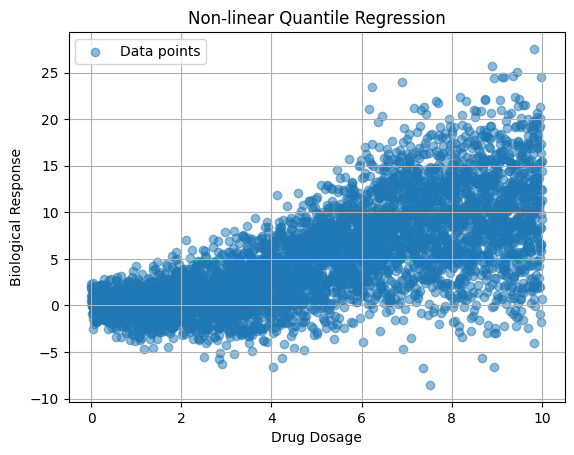

In [108]:
# Plot the original data
plt.scatter(x, y, label='Data points', alpha=0.5)

plt.xlabel('Drug Dosage')
plt.ylabel('Biological Response')
plt.title('Non-linear Quantile Regression')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
train_df, cal_df = train_test_split(df, test_size=0.20, shuffle=True)
X_train, y_train = train_df[['Drug']], train_df[['Response']]
X_cal, y_cal = cal_df[['Drug']], cal_df[['Response']]

In [93]:
import lightgbm as lgb

dataset = lgb.Dataset(X_train, y_train)
quantiles = [0.05, 0.95]
classifiers = {}
for quantile in quantiles:
    params = {
        'objective': 'quantile',
        'alpha': quantile,
        'learning_rate': 0.05,
        'num_leaves': 10,
        'metric': 'quantile',
        'verbose': -1
    }
    
    gbm = lgb.train(params, dataset, num_boost_round=100)
    
    y_pred = gbm.predict(X_cal)
    classifiers[str(quantile)] = {'gbm': gbm, 'predictions': y_pred}


In [94]:
data = pd.DataFrame({'Drug': X_cal.reset_index()['Drug'],
              '0.05': classifiers['0.05']['predictions'],
              '0.95': classifiers['0.95']['predictions'],
              'Response': y_cal.reset_index()['Response']})

In [95]:
data

,Drug,0.05,0.95,Response
0,8.131626,0.844761,16.939238,13.641027
1,9.391878,-0.152989,19.109437,12.892025
2,4.422885,-1.694004,8.585104,8.829011
3,6.131226,1.179935,15.708416,11.204120
4,0.336067,-1.577246,2.406890,1.481071
...,...,...,...,...
995,0.790158,-2.233264,2.417614,-0.916027
996,2.726545,-2.608728,4.631276,3.017994
997,1.716343,-2.544429,2.932112,-0.633262
998,4.388878,-1.694004,8.585104,1.508792


In [96]:
sorted_data = data.sort_values(by='Drug', ascending=True)
sorted_data


,Drug,0.05,0.95,Response
513,0.008002,-1.561143,2.377206,1.942492
747,0.038008,-1.561143,2.377206,-0.800824
875,0.052010,-1.561143,2.377206,0.117425
825,0.054011,-1.561143,2.377206,-0.121622
219,0.066013,-1.561143,2.377206,-1.974713
...,...,...,...,...
916,9.951990,0.284605,20.410399,20.157653
369,9.967994,0.284605,20.410399,6.558656
981,9.983997,0.284605,20.410399,12.477936
595,9.987998,0.284605,20.410399,5.834966


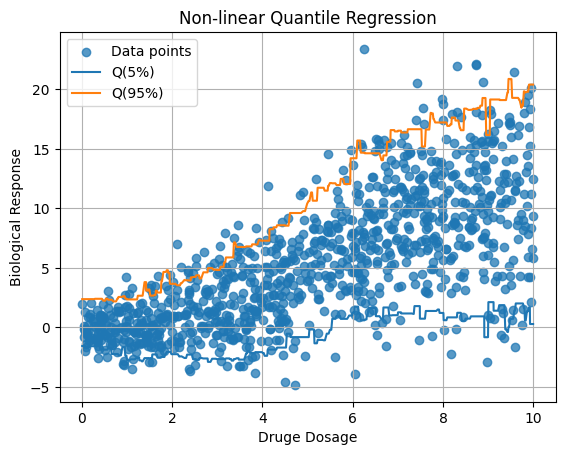

In [107]:
plt.scatter(sorted_data['Drug'], sorted_data['Response'], label='Data points', alpha = 0.75)
plt.plot(sorted_data['Drug'], sorted_data['0.05'], label=f'Q({int(5)}%)')
plt.plot(sorted_data['Drug'], sorted_data['0.95'], label=f'Q({int(95)}%)')
plt.xlabel('Druge Dosage')
plt.ylabel('Biological Response')
plt.title('Non-linear Quantile Regression')
plt.legend()
plt.grid(True)
plt.show()

Now we conformalize the data

In [98]:
sorted_data

,Drug,0.05,0.95,Response
513,0.008002,-1.561143,2.377206,1.942492
747,0.038008,-1.561143,2.377206,-0.800824
875,0.052010,-1.561143,2.377206,0.117425
825,0.054011,-1.561143,2.377206,-0.121622
219,0.066013,-1.561143,2.377206,-1.974713
...,...,...,...,...
916,9.951990,0.284605,20.410399,20.157653
369,9.967994,0.284605,20.410399,6.558656
981,9.983997,0.284605,20.410399,12.477936
595,9.987998,0.284605,20.410399,5.834966


In [99]:
n = 1000
cal_labels = y_cal
model_lower = sorted_data['0.05']
model_upper = sorted_data['0.95']

cal_labels_np = np.array(sorted_data['Response'])

cal_scores = np.maximum(cal_labels_np-model_upper, model_lower-cal_labels_np)

alpha = 0.10
qhat = np.quantile(cal_scores, np.ceil((n+1)*(1-alpha))/n, interpolation='higher')

prediction_sets = [model_lower - qhat, model_upper + qhat]

conformalized_05 = prediction_sets[0].sort_values()
conformalized_95 = prediction_sets[1].sort_values()


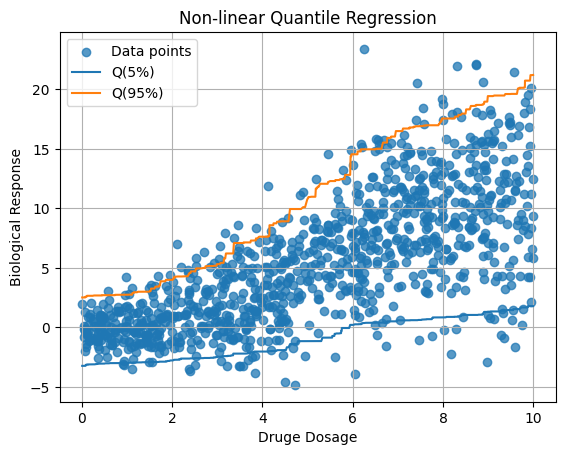

In [106]:
plt.scatter(sorted_data['Drug'], sorted_data['Response'], label='Data points', alpha = 0.75)
plt.plot(sorted_data['Drug'], 
conformalized_05, label=f'Q({int(5)}%)')
plt.plot(sorted_data['Drug'], 
conformalized_95, label=f'Q({int(95)}%)')
plt.xlabel('Druge Dosage')
plt.ylabel('Biological Response')
plt.title('Non-linear Quantile Regression')
plt.legend()
plt.grid(True)
plt.show()

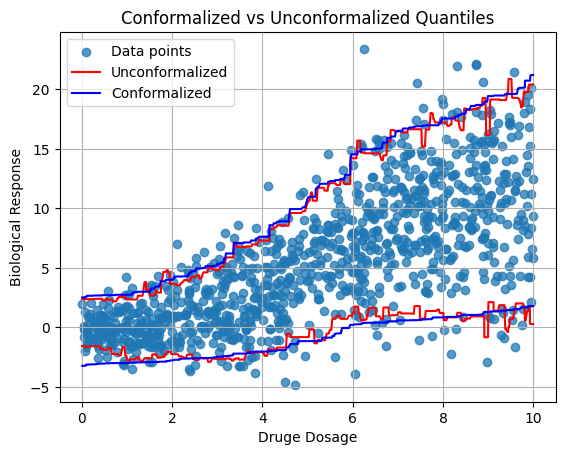

In [101]:
plt.scatter(sorted_data['Drug'], sorted_data['Response'], label='Data points', alpha = 0.75)
plt.plot(sorted_data['Drug'], sorted_data['0.05'], label='Unconformalized', color = "red")
plt.plot(sorted_data['Drug'], sorted_data['0.95'], color = 'red')
plt.plot(sorted_data['Drug'], 
conformalized_05, label= 'Conformalized', color = 'blue')
plt.plot(sorted_data['Drug'], 
conformalized_95, color = 'blue')
plt.xlabel('Druge Dosage')
plt.ylabel('Biological Response')
plt.title('Conformalized vs Unconformalized Quantiles')
plt.legend()
plt.grid(True)
plt.show()

While intuitively we might expect tighter quantiles, this is in fact not the case. The main criticism is that unconformalized quantiles often do not have the research coverage, i.e for 0.05 and 0.95 the coverage should be 90% since this is how much data is between them. Hence we observe that upon conformalization of the quantiles they become wider in certain areas, this indicates that the desired coverage of 90% is achieved more consistently. In particular, we observe that once the heteroskedasticity of the data increases at higher drug dosages, the quantiles are better able to capture the majority of the data. This is preceisly what conformal prediction sets out to do, we want smaller bounds for easier inputs (or in this case, data with less heteroskedasticity) and larger ones for harder inputs. 

### Evaluating Conformal Prediction
<hr style="border:2px solid gray">

We will now evaluate conformal prediction formally, namely by evaluating the adaptivity coverage of the conformal predictors.

Plot Set Size:

To evaluate adaptivity we plot the set size, which in our case is the difference between the 95% quantile and the 5% quantile. 

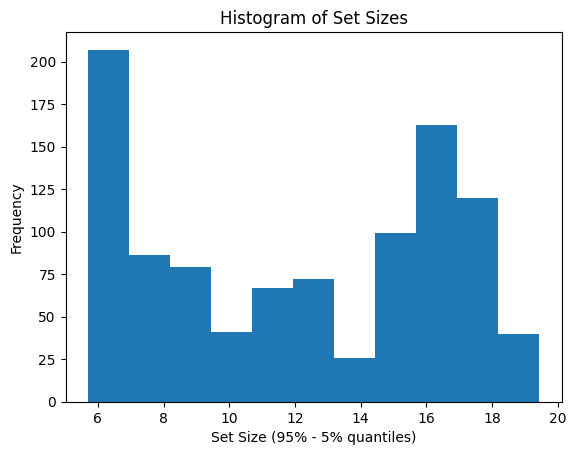

In [102]:
# Calculate set sizes
set_sizes = [abs(q95 - q5) for q95, q5 in zip(conformalized_95, conformalized_05)]

# Plot histogram
plt.hist(set_sizes, bins='auto')
plt.title('Histogram of Set Sizes')
plt.xlabel('Set Size (95% - 5% quantiles)')
plt.ylabel('Frequency')
plt.show()

In [103]:
np.mean(set_sizes)

12.073732843048843

We observe the following:

* Peaks at Smaller Sizes: There's a peak at the smaller end of the set size spectrum, indicating that for a significant number of predictions, the conformal prediction algorithm has a higher degree of certainty (since the prediction intervals are smaller).

* Spread and Distribution: The set sizes are spread between approximately 6 and 20, with a few peaks. This spread suggests variability in the prediction interval sizes, which is expected as the model should produce larger intervals (indicating less certainty) for more difficult or less certain predictions, and smaller intervals (indicating more certainty) for easier or more certain predictions.

* Skewness: The distribution seems right-skewed, meaning there are more instances of smaller set sizes and fewer instances of larger set sizes. This could be desirable as it implies that the model is more certain about its predictions more often than not.

Overall the histogram indicates that the conformal prediction is very adpative, as the average set size of 10.8 is relatively small as well as a good spread across the sizes. These are the two primary criterion for adaptability.

(array([1.000e+00, 1.000e+00, 9.000e+00, 2.500e+01, 5.600e+01, 1.490e+02,
        3.870e+02, 1.045e+03, 2.433e+03, 5.894e+03]),
 array([0.82315789, 0.84084211, 0.85852632, 0.87621053, 0.89389474,
        0.91157895, 0.92926316, 0.94694737, 0.96463158, 0.98231579,
        1.        ]),
 <BarContainer object of 10 artists>)

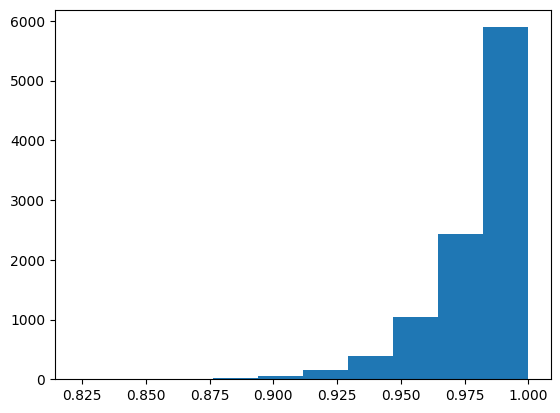

In [104]:
# calculate the coverage R times and store in list
R = 10000
n = 50
alpha = 0.10
coverages = np.zeros((R,))
scores = np.array(cal_scores)
for r in range(R):
    np.random.shuffle(scores) # shuffle
    calib_scores, val_scores = (scores[:n],scores[n:]) # split
    qhat = np.quantile(calib_scores, np.ceil((n+1)*(1-alpha)/n), method='higher') # calibrate 
    coverages[r] = (val_scores <= qhat).astype(float).mean() # see caption

average_coverage = coverages.mean() # should be close to 1-alpha 
plt.hist(coverages) # should be roughly centered at 1-alpha

In [89]:
average_coverage

0.9806817894736841

### Extensions
<hr style="border:2px solid gray">

We observe that the coverage of at least 90% is achieved. However it is worth noting, that the average coverage of $\approx$ 98% is not necessarily a good thing as it indicates that the model is often too conservative and has bounds that are unecessarily wide. While achieveing the desired coverage is of paramount importance, an extremely high coverage indicates the model does not adapt well to the data. This indicates that further investigation to model fitting for the conformalized quantile regression is needed. One suggestion would be treating the nominal quantiles as hyperparameters in cross-validation (so e.g for 90% coverage compare (0.04, 0.96), (0.05, 0.95),(0.06,0.94)). This will likely yield shorter intervals while achieving the desired coverage.

Overall conformal prediction has very promising applications in Machine Learning, as it is a relatively comptationally inexpesnive way to quantify uncertainty regardless of the underlying distribution. This makes it applicable to a wide array of alogirthms such as Regression, classificaiton but also deep neural networks such as for computer vision tasks. Uncertainty is always going to be present in Machine Learning predictions, so having a sucinct methodology to quantify this is a huge benefit. 

There are also major implications for Econometrics, where we often deal with risk and therefore uncertainty. In fact, quantile regression itself is a very commonly used algorithm in Econometrics.